In [17]:
import kagglehub
import shutil
import os

downloaded_path = kagglehub.dataset_download("ikhlaselhamly/nthu-ddd")
print("Downloaded to:", downloaded_path)

LOCAL_DATASET_PATH = "/content/nthu_data"

if not os.path.exists(LOCAL_DATASET_PATH):
    shutil.copytree(downloaded_path, LOCAL_DATASET_PATH)
    print("Data moved to fast local storage!")

DATASET_PATH = LOCAL_DATASET_PATH

100%|██████████| 777M/777M [00:09<00:00, 90.2MB/s]

Extracting files...


Downloaded to: /root/.cache/kagglehub/datasets/ikhlaselhamly/nthu-ddd/versions/1
Data moved to fast local storage!


In [22]:
DATASET_PATH = "/content/nthu_data/NTHU-DDD"

In [23]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,Input
from keras.optimizers import Adam

In [24]:
#importing the dataset for training and splitting for validation
train_ds= tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=32,
    image_size=(224,224), #the images will be squished as they are 640*480 initially
    shuffle=True
)

Found 18000 files belonging to 2 classes.
Using 14400 files for training.


In [25]:
class_names = train_ds.class_names
print(f"Classes found: {class_names}")

Classes found: ['drowsy', 'notdrowsy']


In [26]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 18000 files belonging to 2 classes.
Using 3600 files for validation.


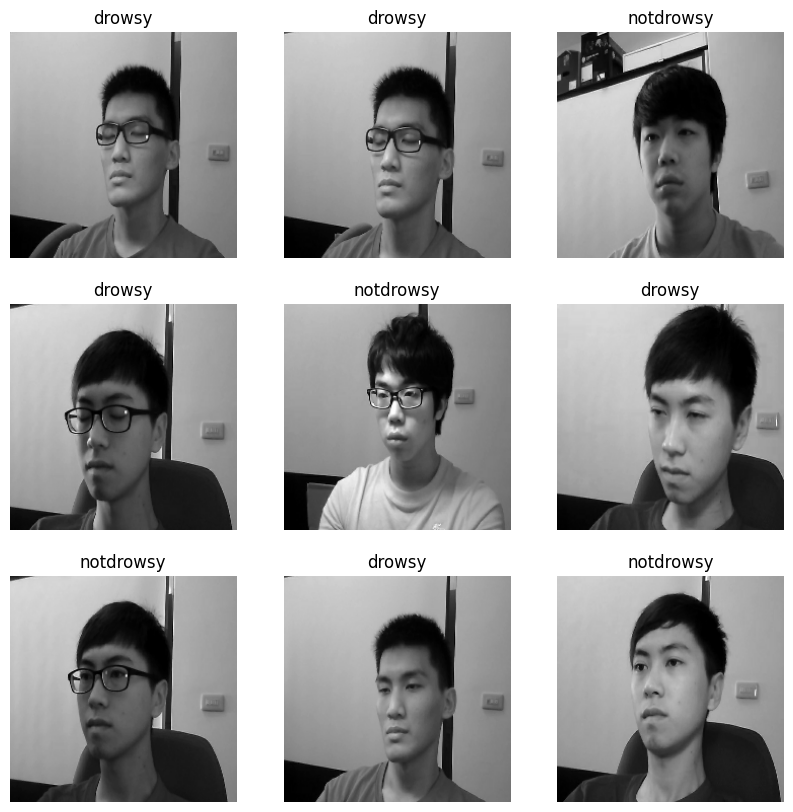

In [27]:
#lets see the squished images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

As we can see that the squished images are fine so no need to use aspect ratio=True

In [28]:
#creating a pipeine for preprocessing the images
data_augmentation= Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [29]:
#creating cnn model
model= Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(224,224,3)),
    layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(128, (3,3), activation='relu',padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(128, (3,3), activation='relu',padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model.build(input_shape=(None, 224, 224, 3)) # 'None' is for batch size
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,666,305 (25.43 MB)

 Trainable params: 6,665,089 (25.43 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [32]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#using early stopping to stop training if overfitting or val acc not improving
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,               # If loss doesn't improve for 5 epochs, STOP
    restore_best_weights=True # Roll back to the best version
)

checkpoint = ModelCheckpoint(
    'best_drowsiness_model.keras',
    monitor='val_accuracy',
    save_best_only=True,      # Only overwrite if accuracy is BETTER
    mode='max',
    verbose=1
)

In [33]:
history=model.fit(train_ds,validation_data=val_ds,epochs=50,callbacks=[early_stop,checkpoint],verbose=1)

Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5769 - loss: 0.8490
Epoch 1: val_accuracy improved from -inf to 0.56306, saving model to best_drowsiness_model.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 69s 143ms/step - accuracy: 0.5770 - loss: 0.8487 - val_accuracy: 0.5631 - val_loss: 0.6656
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6919 - loss: 0.5795
Epoch 2: val_accuracy did not improve from 0.56306
450/450 ━━━━━━━━━━━━━━━━━━━━ 82s 144ms/step - accuracy: 0.6919 - loss: 0.5795 - val_accuracy: 0.5353 - val_loss: 0.8017
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7611 - loss: 0.4854
Epoch 3: val_accuracy improved from 0.56306 to 0.71222, saving model to best_drowsiness_model.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - accuracy: 0.7612 - loss: 0.4854 - val_accuracy: 0.7122 - val_loss: 0.5526
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7823 - loss: 0.4461
Epoch 4: val_accuracy improved from 0.71